# Working with different units

You can use a variety of different unit conventions in `ParticlePhaseSpace`. There are a number of unit sets pre programmed, and it's also easy to create your own.

## Available units

First let's look at what units are currently available:

In [1]:
import sys
from pathlib import Path
sys.path.append('../')  # not necessary when the library is installed
from ParticlePhaseSpace import ParticlePhaseSpaceUnits
from ParticlePhaseSpace import DataLoaders
from ParticlePhaseSpace import PhaseSpace


available_units = ParticlePhaseSpaceUnits()
print(available_units)

Available Unit Sets
cm_MeV:
Length: cm,
Energy: MeV,
Momentum: MeV/c
Velocity: m/s
Mass: MeV/c^2

m_eV:
Length: m,
Energy: eV,
Momentum: eV/c
Velocity: m/s
Mass: eV/c^2

mm_MeV:
Length: mm,
Energy: MeV,
Momentum: MeV/c
Velocity: m/s
Mass: MeV/c^2

p2_sat_UHI:
Length: um,
Energy: MeV,
Momentum: MeV/c
Velocity: m/s
Mass: MeV/c^2

um_keV:
Length: um,
Energy: keV,
Momentum: keV/c
Velocity: m/s
Mass: keV/c^2



From these available units sets, you can pick the one you want like this:

In [2]:
my_units = available_units('mm_MeV')
my_units = available_units.mm_MeV  # equivalalent

You can also easily define new units sets, but we will come to that later.

## Setting units at data read in

By default, `DataLoaders` use `mm_MeV` as the unit set. If you are reading in data with different untis, you just have to pass a unit set:

In [3]:
different_units = available_units('um_keV')
test_data_loc = Path(r'../tests/test_data/coll_PhaseSpace_xAng_0.00_yAng_0.00_angular_error_0.0.phsp').absolute()
ps_data = DataLoaders.Load_TopasData(test_data_loc, units=different_units)

In [4]:
ps_data.data.head()

particle type [pdg_code]     x [um]     y [um]  z [um]  weight  \
0                        22  -0.971177  -0.817280   396.0    0.01   
1                        22  -0.916198   0.839298   396.0    0.01   
2                        22  -5.258902  11.318420   396.0    0.01   
3                        22  15.326971 -25.628899   396.0    0.01   
4                        22  -0.241948  -0.401026   396.0    0.01   

   particle id  time [ps]  px [keV/c]  py [keV/c]  pz [keV/c]  
0            0          0   -0.008856   -0.010509   -3.184060  
1            1          0   -0.003894    0.008249   -1.560114  
2            2          0   -0.193061    0.377104   -1.219742  
3            3          0    0.102889   -0.362594   -1.414843  
4            4          0   -0.000192   -0.001470   -0.209232

Note that this step does not convert any of the numbers in the data; it simply defines what units these numbers represent. When we pass the `DataLoader` to `PhaseSpace`, the units are preserved:

In [5]:
PS = PhaseSpace(ps_data)
PS.get_units()

um_keV:
Length: um,
Energy: keV,
Momentum: keV/c
Velocity: m/s
Mass: keV/c^2

In [6]:
PS.ps_data.head()

particle type [pdg_code]     x [um]     y [um]  z [um]  weight  \
0                        22  -0.971177  -0.817280   396.0    0.01   
1                        22  -0.916198   0.839298   396.0    0.01   
2                        22  -5.258902  11.318420   396.0    0.01   
3                        22  15.326971 -25.628899   396.0    0.01   
4                        22  -0.241948  -0.401026   396.0    0.01   

   particle id  time [ps]  px [keV/c]  py [keV/c]  pz [keV/c]  
0            0          0   -0.008856   -0.010509   -3.184060  
1            1          0   -0.003894    0.008249   -1.560114  
2            2          0   -0.193061    0.377104   -1.219742  
3            3          0    0.102889   -0.362594   -1.414843  
4            4          0   -0.000192   -0.001470   -0.209232

## Changing units after read in

Let'read in the data again, this time with the correct unit set (`mm_MeV`):

In [7]:
ps_data = DataLoaders.Load_TopasData(test_data_loc)
PS = PhaseSpace(ps_data)
PS.get_units()

mm_MeV:
Length: mm,
Energy: MeV,
Momentum: MeV/c
Velocity: m/s
Mass: MeV/c^2

We can now change the units using the `set_units` method:

In [8]:
PS.set_units(different_units)
PS.get_units()

um_keV:
Length: um,
Energy: keV,
Momentum: keV/c
Velocity: m/s
Mass: keV/c^2

In [9]:
PS.ps_data.head()

particle type [pdg_code]        x [um]        y [um]    z [um]  weight  \
0                        22   -971.176758   -817.280090  396000.0    0.01   
1                        22   -916.197754    839.297668  396000.0    0.01   
2                        22  -5258.901367  11318.419922  396000.0    0.01   
3                        22  15326.970703 -25628.898438  396000.0    0.01   
4                        22   -241.947769   -401.025604  396000.0    0.01   

   particle id  time [ps]  px [keV/c]  py [keV/c]   pz [keV/c]  
0            0        0.0   -8.855738  -10.508804 -3184.060481  
1            1        0.0   -3.894435    8.249210 -1560.114059  
2            2        0.0 -193.061367  377.103855 -1219.741850  
3            3        0.0  102.888760 -362.594239 -1414.843426  
4            4        0.0   -0.191501   -1.469658  -209.231939

Note that this time, the actual values in the data **have** changed. Also note that all labels in graphs are automaticall updated, e.g.:

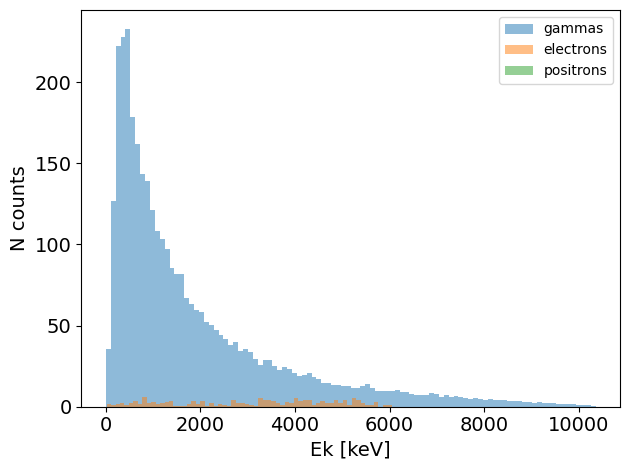

In [10]:
PS.plot.energy_hist_1D()

Whenever you use the `set_units` method, the data will be reset using the `reset_phase_space` method. This means the data is reduced to only the [required columns](https://bwheelz36.github.io/ParticlePhaseSpace/phase_space_format.html), so that any other quantities must be recalculated following a unit change

## Defining new unit sets

If the unit set you want to work with is not already listed in the `available_units` above, you can easily create new unit sets.
The **highly** advised way to do this is to add your new unit set to the `__init__` method of `ParticlePhaseSpace.__unit_config__.ParticlePhaseSpaceUnits` by copying then updating the definition of the existing unit_sets. This is because unit sets defined in this way are subject to automatic testing to ensure for instance consistency between dimensionless quantities. However, if you really want you can also do it manually as below. Note that this is not the preferred method but it will work!

In [11]:
from ParticlePhaseSpace.__unit_config__ import UnitSet, _unit
cm_keV = UnitSet(label='cm_keV',
                              length_units=_unit('cm', 1e-1),
                              energy_units=_unit('keV', 1e3),
                              momentum_units=_unit('keV/c', 1e3),
                              time_units=_unit('ns', 1e-3),
                              mass_units=_unit('keV/c^2', 1e3),
                              velocity_units=_unit('kmph', 1/3.6))
print(cm_keV)

cm_keV:
Length: cm,
Energy: keV,
Momentum: keV/c
Velocity: kmph
Mass: keV/c^2


- In a `UnitSet`, the `label` tag is the name of the UnitSet and is mainly used internally to compare unit sets.
- every other quantity is a `_unit` - each `_unit` comprises a label and a conversion factor. the label is self explanatory. THe conversion factor is the converion which would be needed to convert that quantity to the default unit set of `mm_MeV`. For example, the cm to mm conversion is defined as:

In [12]:
value_in_mm = 1
value_in_cm = .1
cm_conversion = value_in_cm/value_in_mm

> Be very careful about defining unit sets that don't match the conventions of the existing unit sets. The units will defintely work as long as you are changing the **value** of a given unit type, but not if you completely change the type of unit. E.g., defining mass in kg instead of some form of eV/c^2 will not work without substantialy edits to the code.